In [185]:
# import numpy as np

# data = np.loadtxt("../Test signals and benchmarks/outfile2.txt", dtype = int)
# A = data[:, 0:20]

# np.savetxt('outfile.txt', A, fmt='%d')

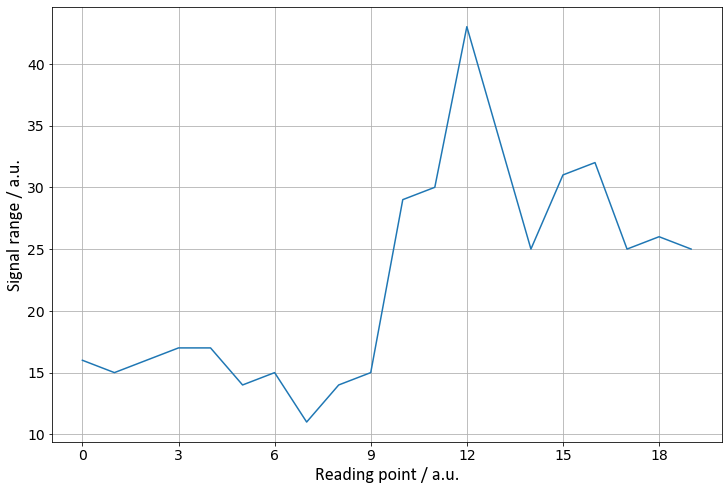

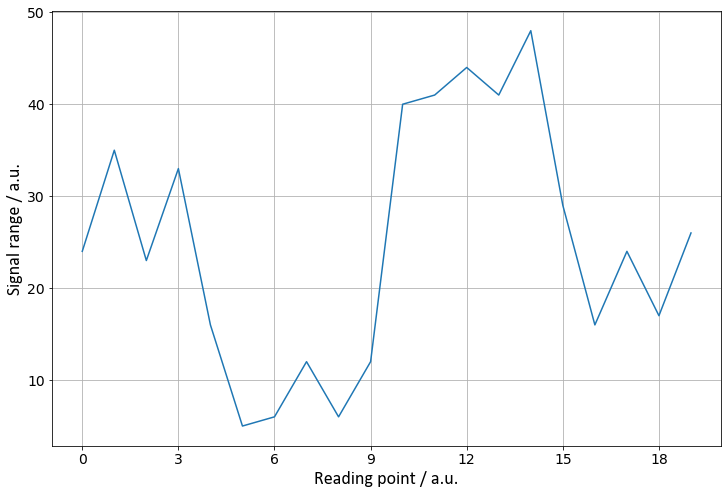

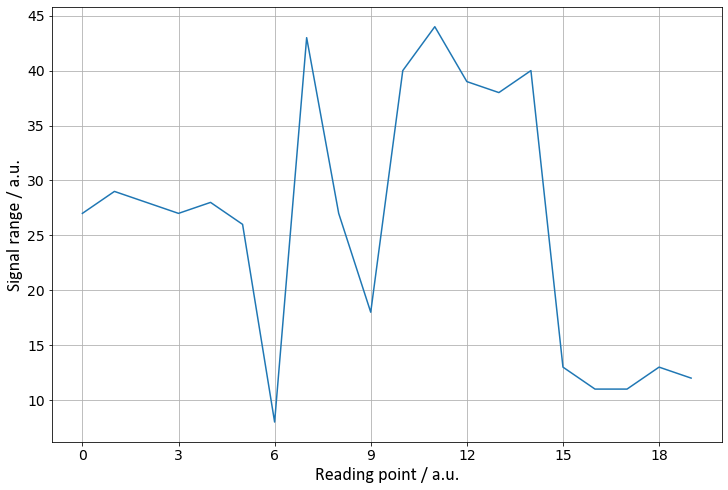

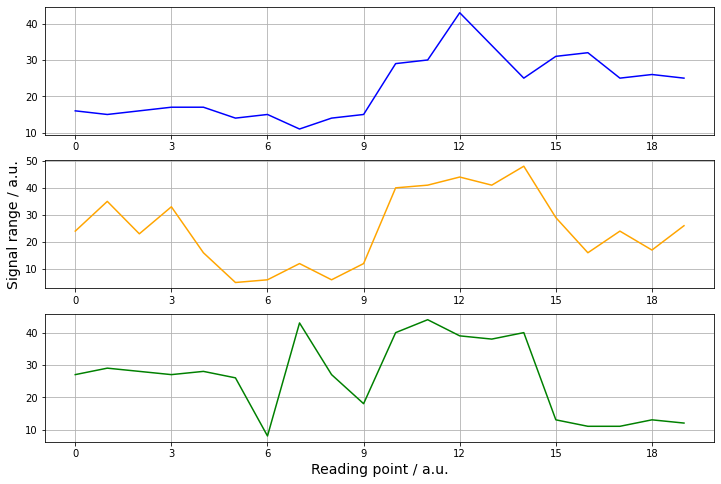

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import pandas as pd


tot = np.loadtxt('outfile.txt', dtype = int)

for i in range(0, 3):
    calibri = {'fontname':'Calibri'}
    ax = plt.figure(figsize = (12, 8)).gca()
    plt.grid()
    plt.plot(tot[i])
    plt.xlabel('Reading point / a.u.', **calibri, fontsize=18)
    plt.ylabel('Signal range / a.u.', **calibri, fontsize=18)
    plt.yticks(fontsize = 14)
    plt.xticks(fontsize = 14)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.show()


fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12, 8))
ax1.grid()
ax2.grid()
ax3.grid()
ax1.plot(tot[0], color="blue")
ax2.plot(tot[1], color="orange")
ax3.plot(tot[2], color="green")
plt.xlabel('Reading point / a.u.', fontsize=14)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax3.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.set_ylabel('Signal range / a.u.', fontsize=14)

plt.savefig("multivariate_test_signal_reduced.svg", bbox_inches="tight")
plt.show()


[[16 15 16 17 17 14 15 11 14 15 29 30 43 34 25 31 32 25 26 25]
 [24 35 23 33 16  5  6 12  6 12 40 41 44 41 48 29 16 24 17 26]
 [27 29 28 27 28 26  8 43 27 18 40 44 39 38 40 13 11 11 13 12]]


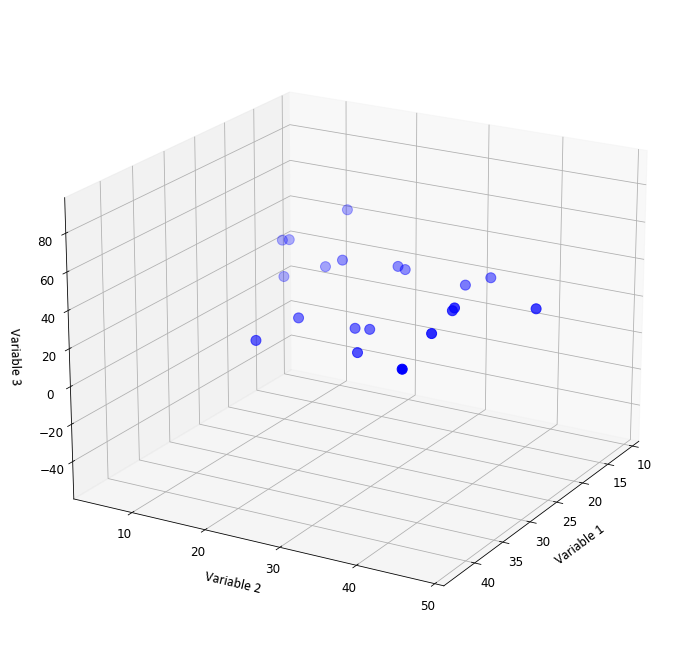

In [2]:
calibri = {'fontname':'Calibri'}
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tot[0], tot[1], tot[2], s=100, color="blue")
ax.set_xlabel('Variable 1', **calibri, fontsize=14, labelpad=10)
ax.set_ylabel('Variable 2', **calibri, fontsize=14, labelpad=10)
ax.set_zlabel('Variable 3', **calibri, fontsize=14, labelpad=10)
ax.set_zlim(-57, 95)
ax.tick_params(labelsize=12)

ax.view_init(20, 30)
plt.savefig("multivariate_test_signal_reduced_3D.svg", bbox_inches="tight")
print(tot)
plt.show()


<IPython.core.display.Javascript object>


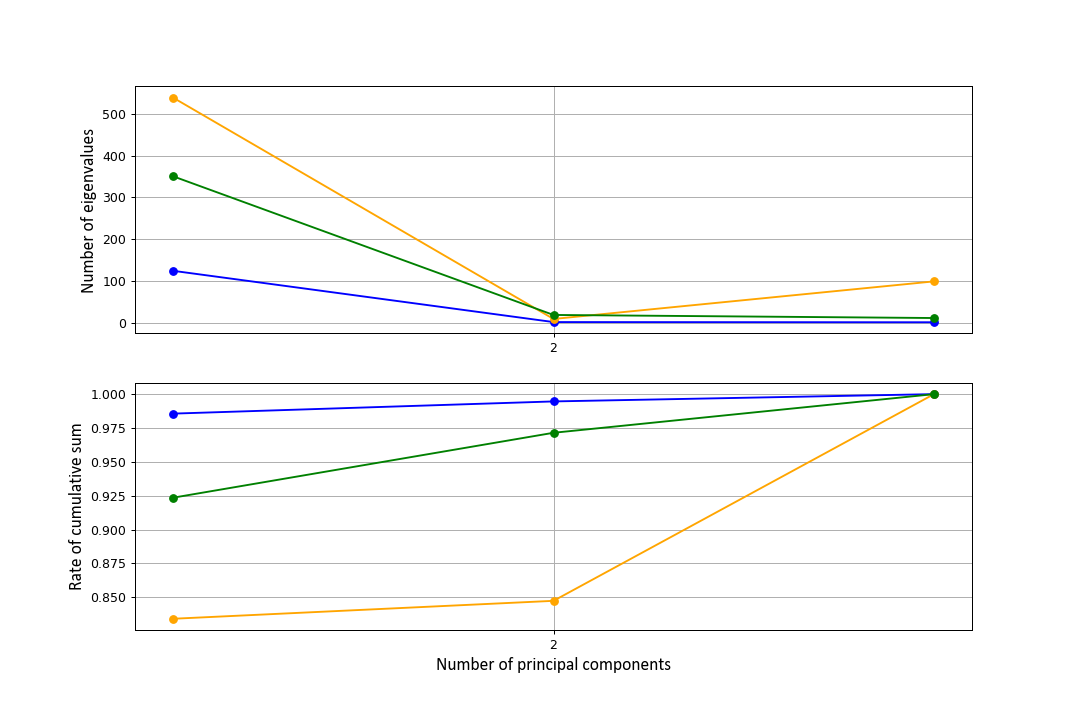

<IPython.core.display.Javascript object>


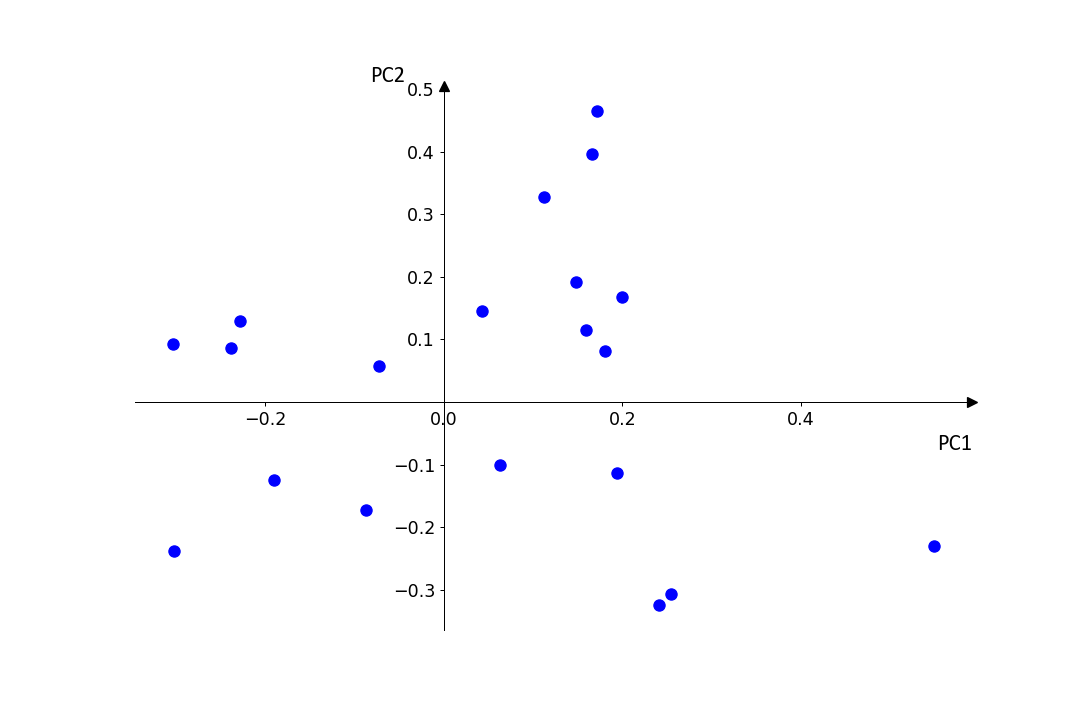

In [7]:
import numpy as np
from sklearn.decomposition import PCA


calibri = {'fontname':'Calibri'}
data = np.asarray(tot)
ncov = 3
dumm = np.round(np.linspace(0, len(data[:][0]) - 1, ncov + 1)).astype(int)

fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 8))
ax1.grid()
ax2.grid()

col = ["blue", "orange", "green"]

for i in range(0, ncov):
    # Compute covariance matrix
    cov = np.cov(data[:, dumm[i]:dumm[i + 1]])
    # Compute eigenvectors from square covariance matrix
    (eigvals, eigvecs) = np.linalg.eig(cov)
    # Return diagonals of eigenmatrix
    diag = -1 * np.diag(eigvals)
#   # Sort diagonals
    diag_sorted = -1 * np.sort(diag)
    diag_sorted = np.ravel(diag_sorted.sum(axis=1))
#   # Plot data
    ax1.plot(diag_sorted, marker="o", color=col[i])
    ax2.plot(np.cumsum(diag_sorted)/np.sum(diag_sorted), marker="o", color=col[i])


plt.xlabel('Number of principal components', **calibri, fontsize=14)
ax1.set_ylabel('Number of eigenvalues', **calibri, fontsize=14)
ax2.set_ylabel('Rate of cumulative sum', **calibri, fontsize=14)
plt.setp([ax1, ax2], xticks=np.arange(1, len(data), 2), xticklabels=np.arange(2, len(data) + 1, 2))
plt.savefig("principal_components.svg", bbox_inches="tight")
plt.show()


pca = PCA(n_components=2)
pca.fit(tot)

fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(1, 1, 1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
yticks = ax.yaxis.get_major_ticks() 
yticks[4].label1.set_visible(False)
ax.plot((1), (0), ls="", marker=">", ms=8, color="k",
            transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0), (1), ls="", marker="^", ms=8, color="k",
            transform=ax.get_xaxis_transform(), clip_on=False)
plt.xlabel('PC1', loc='right', **calibri, fontsize=18)
plt.ylabel('PC2', loc='top', labelpad=-10, **calibri, fontsize=18, rotation=0)
plt.scatter(pca.components_[0], pca.components_[1], s=80, color="blue")
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)

plt.savefig("PCA_reduction.svg", bbox_inches="tight")
plt.show()


<IPython.core.display.Javascript object>


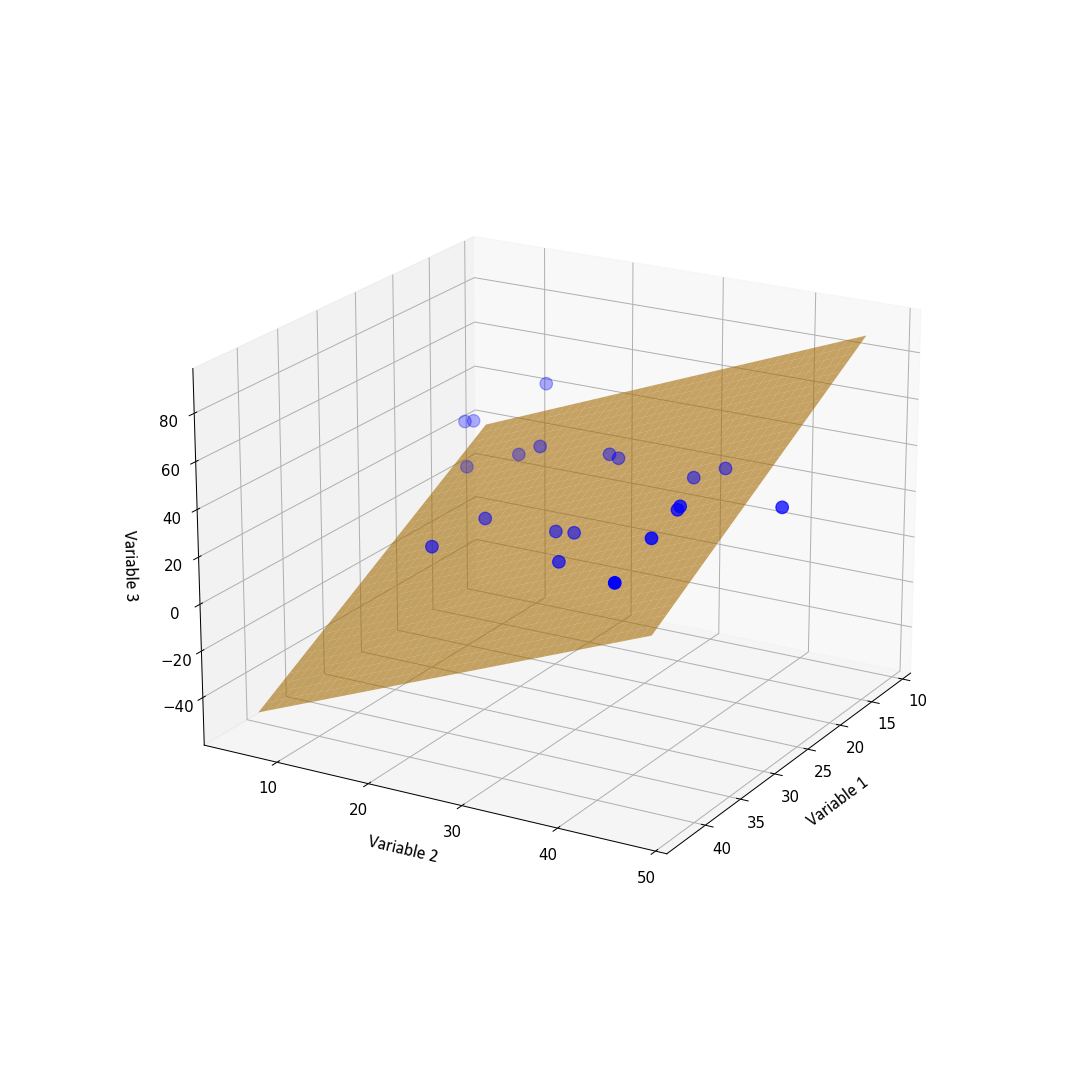

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%matplotlib notebook


A = np.loadtxt('outfile.txt', dtype = int)
X = []
for i in range(0, len(A[0])):
    temp = []
    for j in range(0, 3):
        temp = temp + [A[j, i]]
    X = X + [temp]
X = np.asarray(X)
    
pca = PCA(n_components=3)
pca.fit(X)
eig_vec = pca.components_

# This is the normal vector of minimum variance
normal = eig_vec[2, :]  # (a, b, c)
centroid = np.mean(X, axis=0)

# Every point (x, y, z) on the plane should satisfy a*x+b*y+c*z = d
# Taking centroid as a point on the plane
d = -centroid.dot(normal)

# Draw plane
xx, yy = np.meshgrid(np.arange(np.min(X[:, 0]), np.max(X[:, 0])), np.arange(np.min(X[:, 1]), np.max(X[:, 1])))
z = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]

# plot the surface
calibri = {'fontname':'Calibri'}
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*(X.T), s=100, color="blue")
ax.plot_surface(xx, yy, z, alpha=0.6, color='orange')
ax.set_xlabel('Variable 1', **calibri, fontsize=14, labelpad=10)
ax.set_ylabel('Variable 2', **calibri, fontsize=14, labelpad=10)
ax.set_zlabel('Variable 3', **calibri, fontsize=14, labelpad=10)
ax.tick_params(labelsize=12)

#ax.view_init(20, 30)
#ax.view_init(20, -130)
ax.view_init(20, 30)
plt.savefig("multivariate_test_signal_reduced_3D_hyperplane.svg", bbox_inches="tight")
plt.show()